In [1]:
import sys 
sys.path.append("..")
from src.dataset import Dataset
import pandas as pd
import os

In [2]:
adult_dataset_generator = Dataset("adult")

In [3]:
protected_attributes = ["sex"]
split_dfs, additional_sizes = adult_dataset_generator.split_population(adult_dataset_generator.original_dataframe, protected_attributes)

print(adult_dataset_generator.original_dataframe)

       age         workclass  fnlwgt   education      marital-status  \
0       39         State-gov   77516   Bachelors       Never-married   
1       50  Self-emp-not-inc   83311   Bachelors  Married-civ-spouse   
2       38           Private  215646     HS-grad            Divorced   
3       53           Private  234721        11th  Married-civ-spouse   
4       28           Private  338409   Bachelors  Married-civ-spouse   
...    ...               ...     ...         ...                 ...   
32556   27           Private  257302  Assoc-acdm  Married-civ-spouse   
32557   40           Private  154374     HS-grad  Married-civ-spouse   
32558   58           Private  151910     HS-grad             Widowed   
32559   22           Private  201490     HS-grad       Never-married   
32560   52      Self-emp-inc  287927     HS-grad  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male         

In [4]:
print(adult_dataset_generator.original_mappings["race"])

{0: 'Other', 1: 'White'}


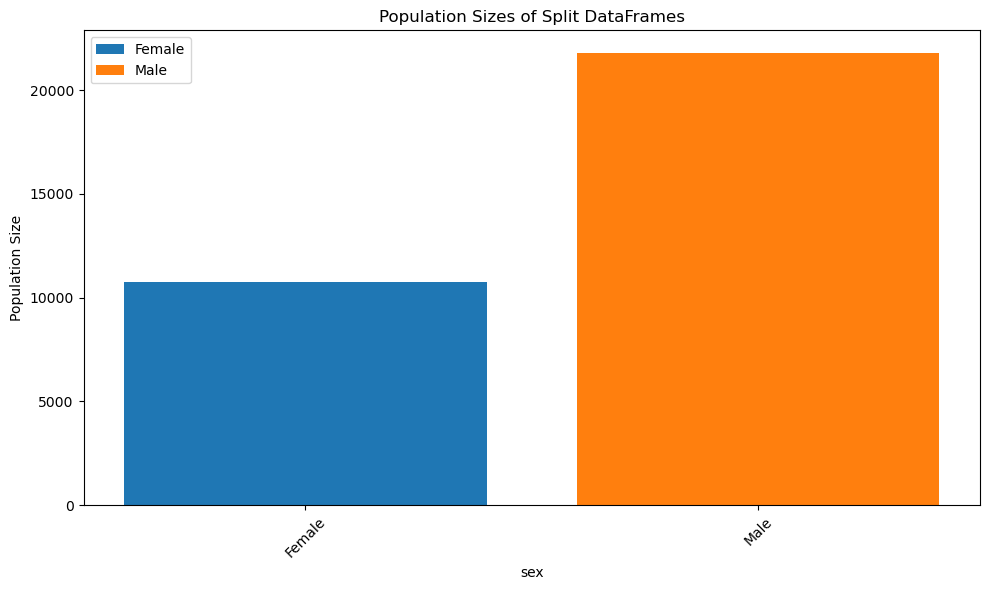

{'Female': 11019}


In [5]:
import matplotlib.pyplot as plt
# Plot population sizes of all split DataFrames
plt.figure(figsize=(10, 6))
for split_key, split_df in split_dfs.items():
    population_size = len(split_df)
    split_key_names = []
    split_key_names_t = str(split_key_names)
    plt.bar(split_key, population_size, label=split_key)

plt.xlabel(', '.join(protected_attributes))
plt.ylabel('Population Size')
plt.title('Population Sizes of Split DataFrames')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
print(additional_sizes)

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Define colors for income categories
# colors = ['#1f77b4', '#ff7f0e']

# # Calculate percentages of income categories for each split
# income_categories = ['<=50K', '>50K']  # Define the income categories
# income_percentages = {}
# legend_labels = []
# for split_key, split_df in split_dfs.items():
#     income_counts = split_df['income'].value_counts(normalize=True) * 100
#     income_percentages[split_key] = [income_counts.get(cat, 0) for cat in income_categories]

# # Plot population sizes of all split DataFrames along with income category percentages
# plt.figure(figsize=(10, 6))
# for i, (split_key, split_df) in enumerate(split_dfs.items()):
#     population_size = len(split_df)
#     income_percentage = income_percentages[split_key]
#     bar_positions = np.arange(len(income_percentage))
#     # Normalize the heights of the stacked bars
#     normalized_heights = np.array(income_percentage) / 100 * population_size
#     # Plot stacked bar chart for each split
#     plt.bar(split_key, normalized_heights[0], color=colors[0])
#     plt.bar(split_key, normalized_heights[1], bottom=normalized_heights[0], color=colors[1])

# plt.xlabel(', '.join(protected_attributes))
# plt.ylabel('Population Size')
# plt.title('Population Sizes of Split DataFrames')
# plt.xticks(rotation=45)

# # Create a separate legend for income categories
# plt.legend(income_categories, loc='upper right')
# plt.tight_layout()
# plt.show()


In [7]:
# # Get the DataFrame with the maximum length
# max_length_df_key = max(split_dfs, key=lambda x: len(split_dfs[x]))
# print(max_length_df_key)
# # Retrieve the DataFrame using the key
# max_length_df = split_dfs[max_length_df_key]

# max_length_df_class_counts = max_length_df['income'].value_counts()

# max_length_df_majority_class = max_length_df_class_counts.idxmax()
# max_length_df_majority_class_count = max_length_df_class_counts[majority_class]

In [8]:
# # Print split information
# for split_key, split_df in split_dfs.items():
#     class_counts = split_df['income'].value_counts()
#     if len(class_counts) >= 2:  # Check if there are at least two classes
#         majority_class = class_counts.idxmax()
#         majority_class_count = class_counts[majority_class]
#         print(f"For split '{split_key}':")
#         for class_label, class_count in class_counts.items():
#             if class_label != majority_class:
#                 minority_class_count = class_count
#                 imbalance = majority_class_count - minority_class_count
#                 instances_needed = imbalance 
#                 print(f"  Class '{class_label}' has {class_count} instances, and {instances_needed} instances are needed for it to become 50/50 with majority class '{majority_class}'.")


In [9]:
augmented_dfs = []
split_df_keys, split_df_vals = zip(*split_dfs.items())

for split_key, split_df in split_dfs.items():
    if split_key in additional_sizes:
        size = additional_sizes[split_key]
        split_synthesizer = adult_dataset_generator.train_synthesizer(split_df, encode=True) 
        split_synthetic_data = adult_dataset_generator.generate_data(split_synthesizer, num=size)
        augmented_data = pd.concat([split_synthetic_data, split_df])
        augmented_dfs.append(augmented_data)
    else:
        augmented_dfs.append(split_df)


In [10]:
final_augmented_dataset = pd.concat(augmented_dfs)

In [11]:
final_augmented_dataset.shape

(43580, 14)

In [12]:
# filename = "augmented_race_4_sex_2.json"
# folder_path = "../synthetic_data"
# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)

# json_file_path = os.path.join(folder_path, filename)
# final_augmented_dataset.to_json(json_file_path, orient='records', lines=True)
